线性回归模型

使用训练集：糖尿病数据集

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

导入数据集

In [44]:
db = load_diabetes()

转DataFrame并进行分析

In [45]:
df = pd.DataFrame(data=db.data, columns=db.feature_names)
df['target'] = db.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


分割数据集

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(db.data, db.target, random_state=6)

模型训练

In [47]:
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()

In [48]:
estimator.fit(x_train, y_train)

LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = estimator.predict(x_test)

# 回归系数
print("Coefficient: ", estimator.coef_)

# 均方误差
print('Mean squared error :%.2f' % mean_squared_error(y_test, y_pred))
# 方差
print('Variance score :%.2f' % r2_score(y_test,y_pred))

Coefficient:  [  -48.98675053  -318.08255483   554.65179402   380.58711323
 -1054.42981694   692.92565969   186.15210198   170.15000155
   807.14392067    92.49599326]
Mean squared error :3197.92
Variance score :0.44


/tmp/ipykernel_146889/4147708226.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)
/data/anaconda3/envs/ML/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30149 (\N{CJK UNIFIED IDEOGRAPH-75C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data/anaconda3/envs/ML/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data/anaconda3/envs/ML/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/data/anaconda3/envs/ML/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRA

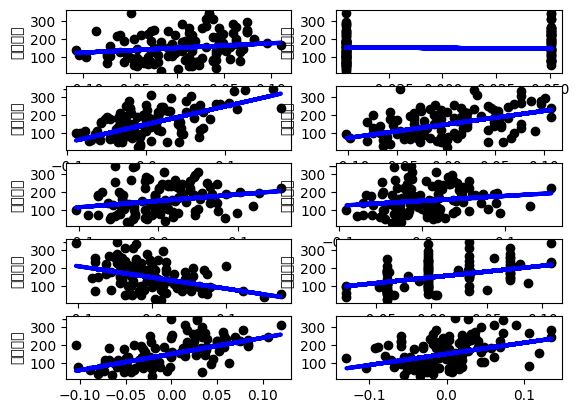

In [50]:
# 对每个特征画出图像
for i in range(0,10):
    # 取出测试集中第 i 个特征
    xi_test = x_test[:,i]
    xi_train = x_train[:,i]
    # 将一维数组 转为 二维
    xi_test = xi_test[:,np.newaxis]
    xi_train = xi_train[:,np.newaxis]


    plt.ylabel(u'病情数值')
    estimator.fit(xi_train,y_train)
    y_hat = estimator.predict(xi_test)
    plt.subplot(5,2,i+1)
    plt.scatter(xi_test,y_test,color='k')

    plt.plot(xi_test,y_hat,color='b',linewidth=3)
plt.show()

In [38]:
df.shape

(442, 11)